In [1]:
#Required models
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense,Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [2]:
#reading the data
df=pd.read_csv("C:/Users/komsu/Downloads/rainfalldata.csv")

In [3]:
#Visualizing the data
print(df)
#we have data of 32 years recorded monthly

           Date  precipitation  temperature  relative humidity  wind speed
0    1990-01-01           0.00        35.72              32.19        6.47
1    1990-02-01           0.00        37.78              31.25        6.55
2    1990-03-01          21.09        38.72              34.81        8.21
3    1990-04-01           0.00        43.05              26.44        8.55
4    1990-05-01         163.48        40.20              61.06       12.24
..          ...            ...          ...                ...         ...
379  2021-08-01         172.51        30.73              84.81        9.72
380  2021-09-01         260.40        29.59              87.31       10.17
381  2021-10-01         101.75        29.65              84.88        6.49
382  2021-11-01          20.18        29.14              86.25        6.18
383  2021-12-01           0.15        27.83              76.69        5.34

[384 rows x 5 columns]


In [4]:
#converting the date values into datetime
train_dates=pd.to_datetime(df['Date'])

In [5]:
#the dates are as follows
train_dates

0     1990-01-01
1     1990-02-01
2     1990-03-01
3     1990-04-01
4     1990-05-01
         ...    
379   2021-08-01
380   2021-09-01
381   2021-10-01
382   2021-11-01
383   2021-12-01
Name: Date, Length: 384, dtype: datetime64[ns]

In [6]:
#As we need to consider 4 attributes(variables) for prediction
cols=list(df)[1:5]

In [7]:
print(cols)

['precipitation', 'temperature', 'relative humidity', 'wind speed']


In [8]:
#Coverting data into flot values
training_df=df[cols].astype(float)

<AxesSubplot:>

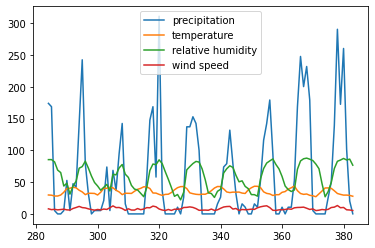

In [9]:
#Plotting the last 100 values 
plot_df=training_df.tail(100)
plot_df.plot.line()

In [10]:
#We need to normalize the data using Standard scalar
scalar=StandardScaler()
#Considering the whole data we normalize the data
#Fit the data accordingly
scalar=scalar.fit(training_df)
#Tranforming whole data into normalized form from the fitted data
training_df_scaled=scalar.transform(training_df)

In [11]:
#Lists for storing the training data considering multiple variables
#trainX for storing training data (temperature,wind speed,relative humidity)
#trainY for storing target values(rainfall)
trainX=[] 
trainY=[]

In [13]:
n_past=20#20 values will be considered to predict the next values
n_fut=1#for predicting the next 1 value based on previous 20 values

In [14]:
#The normalized values are
training_df_scaled

array([[-0.79595023,  0.21372544, -1.32049151, -0.87260584],
       [-0.79595023,  0.52440457, -1.36668704, -0.8357164 ],
       [-0.53991428,  0.66617077, -1.19173374, -0.07026046],
       ...,
       [ 0.43931093, -0.70172229,  1.2689157 , -0.86338348],
       [-0.55096182, -0.778638  ,  1.33624324, -1.00633007],
       [-0.7941292 , -0.9762058 ,  0.86642481, -1.39366922]])

In [15]:
#Adding the values to trainX and trainY lists
for i in range(n_past,len(training_df_scaled)-n_fut+1):
    trainX.append(training_df_scaled[i-n_past:i,0:training_df_scaled.shape[1]])
    trainY.append(training_df_scaled[i+n_fut-1:i+n_fut,0])

In [16]:
#Converting into numpy arrays
trainX,trainY=np.array(trainX),np.array(trainY)

In [17]:
#trainX data is as follows-20 window size
print(trainX)

[[[-0.79595023  0.21372544 -1.32049151 -0.87260584]
  [-0.79595023  0.52440457 -1.36668704 -0.8357164 ]
  [-0.53991428  0.66617077 -1.19173374 -0.07026046]
  ...
  [ 1.57283756 -3.19469609  0.57450834  2.19382909]
  [ 0.80460831 -3.36662532  1.13327775  1.66815453]
  [ 1.44475888 -3.6757963   1.19814808  0.72286256]]

 [[-0.79595023  0.52440457 -1.36668704 -0.8357164 ]
  [-0.53991428  0.66617077 -1.19173374 -0.07026046]
  [-0.79595023  1.31920021 -1.60307058  0.08651967]
  ...
  [ 0.80460831 -3.36662532  1.13327775  1.66815453]
  [ 1.44475888 -3.6757963   1.19814808  0.72286256]
  [ 0.86858695 -4.25191003  1.04137812 -1.03860833]]

 [[-0.53991428  0.66617077 -1.19173374 -0.07026046]
  [-0.79595023  1.31920021 -1.60307058  0.08651967]
  [ 1.18872293  0.88937714  0.09830117  1.78804522]
  ...
  [ 1.44475888 -3.6757963   1.19814808  0.72286256]
  [ 0.86858695 -4.25191003  1.04137812 -1.03860833]
  [-0.34785697 -3.96686946  0.86298472 -0.16709525]]

 ...

 [[-0.79595023  0.13228528 -0.7459

In [19]:
#Based on 20 previous values next value has to be predicted in a slidding manner
print(trainY)

[[ 0.86858695]
 [-0.34785697]
 [-0.47581424]
 [-0.79595023]
 [-0.79595023]
 [-0.79595023]
 [-0.79595023]
 [-0.73197159]
 [-0.28375693]
 [ 0.67652963]
 [ 0.54845096]
 [ 2.34106681]
 [ 0.29241501]
 [-0.34785697]
 [ 0.16433633]
 [-0.79595023]
 [-0.79595023]
 [-0.79595023]
 [-0.79595023]
 [-0.60389291]
 [-0.66787155]
 [-0.02772098]
 [ 1.31668021]
 [ 1.50873752]
 [ 0.74050827]
 [ 0.42049368]
 [-0.79595023]
 [-0.4118356 ]
 [-0.66787155]
 [-0.66787155]
 [-0.79595023]
 [-0.53991428]
 [-0.79595023]
 [ 0.22843637]
 [ 0.74050827]
 [ 1.57283756]
 [-0.28375693]
 [ 1.82887351]
 [-0.47581424]
 [-0.79595023]
 [-0.28375693]
 [-0.79595023]
 [-0.28375693]
 [-0.73197159]
 [-0.02772098]
 [ 0.86858695]
 [ 1.89285214]
 [ 1.38078025]
 [ 0.86858695]
 [ 2.34106681]
 [-0.60389291]
 [-0.79595023]
 [-0.79595023]
 [-0.73197159]
 [-0.79595023]
 [-0.21977829]
 [-0.66787155]
 [ 0.22843637]
 [ 1.44475888]
 [ 3.10929605]
 [ 0.93256558]
 [ 0.612551  ]
 [-0.28375693]
 [-0.79595023]
 [-0.21977829]
 [-0.79595023]
 [-0.60389

In [21]:
print('trainX shape == {}'.format(trainX.shape))#Knowing the shape 
#(364,20,4) means there are 364windows(groups) of 20*4

trainX shape == (364, 20, 4)


In [22]:
print('trainY shape == {}'.format(trainY.shape))
#There are 364 values from previous values

trainY shape == (364, 1)


In [23]:
#Creating the model
model=Sequential()
model.add(LSTM(128,activation='relu',input_shape=(trainX.shape[1],trainX.shape[2]),return_sequences=True))
model.add(LSTM(64,activation='relu',return_sequences=True))
model.add(LSTM(32,activation='relu',return_sequences=True))
model.add(LSTM(16,activation='relu',return_sequences=False))
model.add(Dropout(0.3))
model.add(Dense(trainY.shape[1]))

In [28]:
#optimizer used is adam with loss function mse(Mean Squared Error)
model.compile(optimizer='adam',loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 20, 128)           68096     
_________________________________________________________________
lstm_1 (LSTM)                (None, 20, 64)            49408     
_________________________________________________________________
lstm_2 (LSTM)                (None, 20, 32)            12416     
_________________________________________________________________
lstm_3 (LSTM)                (None, 16)                3136      
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 17        
Total params: 133,073
Trainable params: 133,073
Non-trainable params: 0
__________________________________________________

In [29]:
#Fitting the model
history=model.fit(trainX,trainY,epochs=30,batch_size=5,validation_split=0.2,verbose=1)


Epoch 1/30
59/59 [==============================] - 64s 664ms/step - loss: 1.0193 - val_loss: 0.9870
Epoch 2/30
59/59 [==============================] - 34s 574ms/step - loss: 1.1068 - val_loss: 0.9763
Epoch 3/30
59/59 [==============================] - 34s 576ms/step - loss: 0.9538 - val_loss: 0.8755
Epoch 4/30
59/59 [==============================] - 34s 579ms/step - loss: 1.1176 - val_loss: 0.8550
Epoch 5/30
59/59 [==============================] - 34s 574ms/step - loss: 0.7454 - val_loss: 0.6521
Epoch 6/30
59/59 [==============================] - 33s 558ms/step - loss: 0.5127 - val_loss: 1.2812
Epoch 7/30
59/59 [==============================] - 34s 581ms/step - loss: 0.7255 - val_loss: 0.5778
Epoch 8/30
59/59 [==============================] - 33s 563ms/step - loss: 0.5548 - val_loss: 0.4898
Epoch 9/30
59/59 [==============================] - 34s 571ms/step - loss: 0.6252 - val_loss: 0.5206
Epoch 10/30
59/59 [==============================] - 34s 569ms/step - loss: 0.7164 - val_lo

In [30]:
n_fut=36#We need to predict next 36 months from the given date,2022-01-01
forecast_dates=pd.date_range(list(train_dates)[-1],periods=n_fut,freq='1m').tolist()

In [31]:
#Next 36 months are
forecast_dates

[Timestamp('2021-12-31 00:00:00', freq='M'),
 Timestamp('2022-01-31 00:00:00', freq='M'),
 Timestamp('2022-02-28 00:00:00', freq='M'),
 Timestamp('2022-03-31 00:00:00', freq='M'),
 Timestamp('2022-04-30 00:00:00', freq='M'),
 Timestamp('2022-05-31 00:00:00', freq='M'),
 Timestamp('2022-06-30 00:00:00', freq='M'),
 Timestamp('2022-07-31 00:00:00', freq='M'),
 Timestamp('2022-08-31 00:00:00', freq='M'),
 Timestamp('2022-09-30 00:00:00', freq='M'),
 Timestamp('2022-10-31 00:00:00', freq='M'),
 Timestamp('2022-11-30 00:00:00', freq='M'),
 Timestamp('2022-12-31 00:00:00', freq='M'),
 Timestamp('2023-01-31 00:00:00', freq='M'),
 Timestamp('2023-02-28 00:00:00', freq='M'),
 Timestamp('2023-03-31 00:00:00', freq='M'),
 Timestamp('2023-04-30 00:00:00', freq='M'),
 Timestamp('2023-05-31 00:00:00', freq='M'),
 Timestamp('2023-06-30 00:00:00', freq='M'),
 Timestamp('2023-07-31 00:00:00', freq='M'),
 Timestamp('2023-08-31 00:00:00', freq='M'),
 Timestamp('2023-09-30 00:00:00', freq='M'),
 Timestamp

In [32]:
from datetime import timedelta,date
#Since the days are end of the month we will add 1 day to each
fd=[]
for i in range(len(forecast_dates)): 
    dr =pd.to_datetime(forecast_dates[i])+pd.DateOffset(days=1)
    fd.append(dr)

In [33]:
#new dates from 2022-01-01
fd

[Timestamp('2022-01-01 00:00:00'),
 Timestamp('2022-02-01 00:00:00'),
 Timestamp('2022-03-01 00:00:00'),
 Timestamp('2022-04-01 00:00:00'),
 Timestamp('2022-05-01 00:00:00'),
 Timestamp('2022-06-01 00:00:00'),
 Timestamp('2022-07-01 00:00:00'),
 Timestamp('2022-08-01 00:00:00'),
 Timestamp('2022-09-01 00:00:00'),
 Timestamp('2022-10-01 00:00:00'),
 Timestamp('2022-11-01 00:00:00'),
 Timestamp('2022-12-01 00:00:00'),
 Timestamp('2023-01-01 00:00:00'),
 Timestamp('2023-02-01 00:00:00'),
 Timestamp('2023-03-01 00:00:00'),
 Timestamp('2023-04-01 00:00:00'),
 Timestamp('2023-05-01 00:00:00'),
 Timestamp('2023-06-01 00:00:00'),
 Timestamp('2023-07-01 00:00:00'),
 Timestamp('2023-08-01 00:00:00'),
 Timestamp('2023-09-01 00:00:00'),
 Timestamp('2023-10-01 00:00:00'),
 Timestamp('2023-11-01 00:00:00'),
 Timestamp('2023-12-01 00:00:00'),
 Timestamp('2024-01-01 00:00:00'),
 Timestamp('2024-02-01 00:00:00'),
 Timestamp('2024-03-01 00:00:00'),
 Timestamp('2024-04-01 00:00:00'),
 Timestamp('2024-05-

In [34]:
#Every window(slide) of 20 size will look like
trainX[-1:]

array([[[-0.66787155,  1.0356678 , -1.17011029, -0.46221079],
        [-0.15579965,  1.44739305, -1.05363857,  0.56608243],
        [ 1.25270157,  0.34191828,  0.55632499,  0.82430853],
        [ 2.21298813, -0.32920897,  1.19519942,  0.88886505],
        [ 1.63681619, -0.53130122,  1.36376399,  1.06408991],
        [ 2.02093082, -0.4453366 ,  1.41290817,  0.27096689],
        [ 1.38078025, -0.75450758,  1.3298545 , -0.61899092],
        [-0.73197159, -0.87214337,  1.22566882, -0.21320705],
        [-0.79595023, -1.08931713,  0.94947849, -1.43055866],
        [-0.79595023, -0.41366543,  0.59613179, -1.1631102 ],
        [-0.79595023,  0.26801888, -0.5621967 , -0.65126918],
        [-0.79595023,  0.98439066, -1.57849849, -0.91410646],
        [-0.48139871,  0.99947217, -1.17011029, -0.53598967],
        [-0.18457183,  0.89390159, -0.46390833,  0.78280791],
        [ 0.89323147,  0.31627971,  0.61136648,  1.07331227],
        [ 2.73210132, -0.32317636,  1.16718724,  2.23071854],
        

In [35]:
#Based on the last 36 trainX values(windows) next 36 months rainfall will be predicted
forecast=model.predict(trainX[-n_fut:])

In [36]:
#Predicted forecast values are
np.array(forecast)

array([[-0.57463676],
       [-0.57220364],
       [-0.57077694],
       [-0.55828977],
       [-0.48076165],
       [ 0.27790073],
       [ 1.2758713 ],
       [ 1.293107  ],
       [ 0.85699135],
       [ 0.52620584],
       [-0.38138682],
       [-0.5629324 ],
       [-0.5904186 ],
       [-0.59544694],
       [-0.5855462 ],
       [-0.5723351 ],
       [ 0.04211038],
       [ 1.1789101 ],
       [ 1.2301558 ],
       [ 1.154048  ],
       [ 0.92742777],
       [ 0.18469629],
       [-0.5692985 ],
       [-0.617971  ],
       [-0.6221207 ],
       [-0.6134187 ],
       [-0.61468065],
       [-0.6090557 ],
       [-0.579187  ],
       [-0.14142007],
       [ 0.40397647],
       [ 0.836182  ],
       [ 0.53525794],
       [-0.02803721],
       [-0.58648044],
       [-0.5986865 ]], dtype=float32)

In [37]:
training_df.shape

(384, 4)

In [38]:
#Since the forecast values are normalized form we need to convert that intlo original form.
forecast_copy=np.repeat(np.array(forecast),training_df.shape[1],axis=1)#Dummy values has to be created to convert to original form
#true_copy=np.repeat(np.array(trainY),training_df.shape[1],axis=1)
fut_pred=scalar.inverse_transform(forecast_copy)[:,0]
#fut_true=scalar.inverse_transform(true_copy)[:,0]

In [39]:
#Predictions are
fut_pred

array([ 18.229866,  18.430286,  18.547806,  19.57639 ,  25.962475,
        88.45444 , 170.65852 , 172.07825 , 136.15486 , 108.90764 ,
        34.1481  ,  19.19397 ,  16.929897,  16.515705,  17.331242,
        18.419456,  69.0321  , 162.6717  , 166.89288 , 160.62378 ,
       141.95679 ,  80.77708 ,  18.669586,  14.66037 ,  14.318558,
        15.035351,  14.9314  ,  15.394733,  17.85506 ,  53.914463,
        98.839455, 134.44077 , 109.653275,  63.253952,  17.254288,
        16.24886 ], dtype=float32)

In [40]:
#Dataframe for date with predicted values
df_forecast=pd.DataFrame({'Date':np.array(fd),'precipitation':fut_pred})
df_forecast['Date']=pd.to_datetime(df_forecast['Date'])

In [41]:
#Already available data(original)
org=df[['Date','precipitation']]
org['Date'] =pd.to_datetime(org['Date'])
org=org.loc[org['Date']>='2019-05-01']

<ipython-input-41-a7ce1e7a08a7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  org['Date'] =pd.to_datetime(org['Date'])


In [42]:
#Orginal values with dates from 2019-05-01(yyyy-mm-dd)
org

,Date,precipitation
352,2019-05-01,10.55
353,2019-06-01,52.73
354,2019-07-01,116.02
355,2019-08-01,142.38
356,2019-09-01,179.30
357,2019-10-01,94.92
358,2019-11-01,0.00
359,2019-12-01,0.00
360,2020-01-01,10.55
361,2020-02-01,0.00


In [43]:
#Forecast values 
df_forecast

,Date,precipitation
0,2022-01-01,18.229866
1,2022-02-01,18.430286
2,2022-03-01,18.547806
3,2022-04-01,19.576389
4,2022-05-01,25.962475
5,2022-06-01,88.454437
6,2022-07-01,170.658524
7,2022-08-01,172.078247
8,2022-09-01,136.154861
9,2022-10-01,108.907639


C:\Users\komsu\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\komsu\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Date', ylabel='precipitation'>

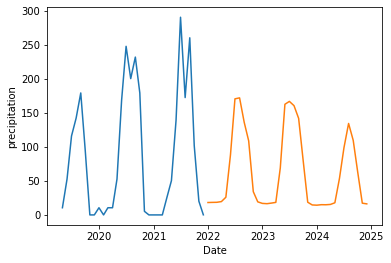

In [44]:
#plotting the last years rainfall(2019,2020,2021) in blue and next years rainfall(2022-2023-2024) in yellow
sns.lineplot(org['Date'],org['precipitation'])
sns.lineplot(df_forecast['Date'],df_forecast['precipitation'])

In [45]:
#Predictions for 12 months of 2021 year
n_fut_21=12
forecast_dates_2021=pd.date_range(list(train_dates)[-13],periods=n_fut_21,freq='1m').tolist()

In [46]:
#Dates from 2021 are
forecast_dates_2021

[Timestamp('2020-12-31 00:00:00', freq='M'),
 Timestamp('2021-01-31 00:00:00', freq='M'),
 Timestamp('2021-02-28 00:00:00', freq='M'),
 Timestamp('2021-03-31 00:00:00', freq='M'),
 Timestamp('2021-04-30 00:00:00', freq='M'),
 Timestamp('2021-05-31 00:00:00', freq='M'),
 Timestamp('2021-06-30 00:00:00', freq='M'),
 Timestamp('2021-07-31 00:00:00', freq='M'),
 Timestamp('2021-08-31 00:00:00', freq='M'),
 Timestamp('2021-09-30 00:00:00', freq='M'),
 Timestamp('2021-10-31 00:00:00', freq='M'),
 Timestamp('2021-11-30 00:00:00', freq='M')]

In [47]:
#Adding 1 day
fd_21=[]
for i in range(len(forecast_dates_2021)): 
    dr =pd.to_datetime(forecast_dates_2021[i])+pd.DateOffset(days=1)
    fd_21.append(dr)

In [48]:
#Days from 2021-01-01
fd_21

[Timestamp('2021-01-01 00:00:00'),
 Timestamp('2021-02-01 00:00:00'),
 Timestamp('2021-03-01 00:00:00'),
 Timestamp('2021-04-01 00:00:00'),
 Timestamp('2021-05-01 00:00:00'),
 Timestamp('2021-06-01 00:00:00'),
 Timestamp('2021-07-01 00:00:00'),
 Timestamp('2021-08-01 00:00:00'),
 Timestamp('2021-09-01 00:00:00'),
 Timestamp('2021-10-01 00:00:00'),
 Timestamp('2021-11-01 00:00:00'),
 Timestamp('2021-12-01 00:00:00')]

In [49]:
#Predicting the 2021 rainfall
forecast21=model.predict(trainX[-n_fut_21-12:-n_fut_21])

In [50]:
np.array(forecast21)

array([[-0.5904186 ],
       [-0.59544694],
       [-0.5855462 ],
       [-0.5723351 ],
       [ 0.04211038],
       [ 1.1789101 ],
       [ 1.2301558 ],
       [ 1.154048  ],
       [ 0.92742777],
       [ 0.18469629],
       [-0.5692985 ],
       [-0.617971  ]], dtype=float32)

In [51]:
#orginal rainfall values of 2021
trainY[-n_fut_21:]

array([[-0.79595023],
       [-0.79595023],
       [-0.79595023],
       [-0.48139871],
       [-0.18457183],
       [ 0.89323147],
       [ 2.73210132],
       [ 1.29834857],
       [ 2.36534712],
       [ 0.43931093],
       [-0.55096182],
       [-0.7941292 ]])

In [52]:
#Normalized form will be converted to orginal form
forecast_copy_21=np.repeat(np.array(forecast21),training_df.shape[1],axis=1)
#true_copy=np.repeat(np.array(trainY),training_df.shape[1],axis=1)
fut_pred_21=scalar.inverse_transform(forecast_copy_21)[:,0]
#fut_true=scalar.inverse_transform(true_copy)[:,0]

In [53]:
#Converting the trainY values from normalized form to orginal form
forecast_copy_Y=np.repeat(np.array(trainY[-n_fut_21:]),training_df.shape[1],axis=1)
#true_copy=np.repeat(np.array(trainY),training_df.shape[1],axis=1)
fut_pred_Y=scalar.inverse_transform(forecast_copy_Y)[:,0]
#fut_true=scalar.inverse_transform(true_copy)[:,0]

In [54]:
#Y true values are
Y_true=fut_pred_Y.flatten()

In [55]:
Y_true

array([0.0000e+00, 0.0000e+00, 0.0000e+00, 2.5910e+01, 5.0360e+01,
       1.3914e+02, 2.9061e+02, 1.7251e+02, 2.6040e+02, 1.0175e+02,
       2.0180e+01, 1.5000e-01])

In [56]:
#Dataframe with dates from 2021(12 months) true values and predicted values
df_forecast_21=pd.DataFrame({'Date':np.array(fd_21),'true':Y_true,'precipitation':fut_pred_21})
df_forecast_21['Date']=pd.to_datetime(df_forecast_21['Date'])

In [57]:
#Displaying the values
df_forecast_21

,Date,true,precipitation
0,2021-01-01,0.00,16.929897
1,2021-02-01,0.00,16.515705
2,2021-03-01,0.00,17.331242
3,2021-04-01,25.91,18.419456
4,2021-05-01,50.36,69.032097
5,2021-06-01,139.14,162.671707
6,2021-07-01,290.61,166.892883
7,2021-08-01,172.51,160.623779
8,2021-09-01,260.40,141.956787
9,2021-10-01,101.75,80.777077


C:\Users\komsu\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\komsu\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Date', ylabel='true'>

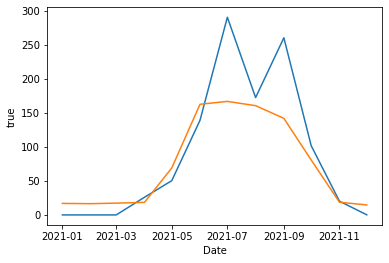

In [58]:
sns.lineplot(df_forecast_21['Date'],df_forecast_21['true'])#blue-true values
sns.lineplot(df_forecast_21['Date'],df_forecast_21['precipitation'])#yellow-predicted values

In [59]:
forecast=model.predict(trainX[:])

In [60]:
np.array(forecast)

array([[ 0.47712058],
       [-0.32668343],
       [-0.5827186 ],
       [-0.58596635],
       [-0.55839705],
       [-0.5597389 ],
       [-0.5499724 ],
       [-0.54030067],
       [-0.5131047 ],
       [-0.34230933],
       [ 0.32961342],
       [ 0.52846855],
       [-0.16608429],
       [-0.41606587],
       [-0.4882701 ],
       [-0.5021498 ],
       [-0.4929927 ],
       [-0.47296888],
       [-0.53101665],
       [-0.56599545],
       [-0.5150166 ],
       [-0.40691477],
       [ 0.5823207 ],
       [ 0.9822551 ],
       [ 0.8412866 ],
       [ 0.30744478],
       [-0.5121403 ],
       [-0.5881502 ],
       [-0.59494907],
       [-0.59307915],
       [-0.59600747],
       [-0.5896617 ],
       [-0.4873929 ],
       [ 0.04291563],
       [ 0.7289245 ],
       [ 1.3131671 ],
       [ 0.7946513 ],
       [ 0.32886693],
       [-0.50902104],
       [-0.59661144],
       [-0.60629135],
       [-0.60616827],
       [-0.6059543 ],
       [-0.5882506 ],
       [-0.5187904 ],
       [-0

In [61]:
#Normalized form will be converted to orginal form
forecast_copy_t=np.repeat(np.array(forecast),training_df.shape[1],axis=1)
#true_copy=np.repeat(np.array(trainY),training_df.shape[1],axis=1)
fut_pred_21_t=scalar.inverse_transform(forecast_copy_t)[:,0]
#fut_true=scalar.inverse_transform(true_copy)[:,0]

In [62]:
fut_pred_21_t

array([104.864426 ,  38.65409  ,  17.564156 ,  17.296635 ,  19.56755  ,
        19.457024 ,  20.261497 ,  21.058174 ,  23.29834  ,  37.366966 ,
        92.71408  , 109.094025 ,  51.882843 ,  31.291546 ,  25.343994 ,
        24.200706 ,  24.95499  ,  26.604378 ,  21.82291  ,  18.941662 ,
        23.14085  ,  32.045334 , 113.52989  , 146.47299  , 134.86124  ,
        90.88802  ,  23.37778  ,  17.116749 ,  16.556717 ,  16.710743 ,
        16.469536 ,  16.99224  ,  25.416252 ,  69.09843  , 125.60583  ,
       173.73062  , 131.01984  ,  92.65259  ,  23.634716 ,  16.419785 ,
        15.622437 ,  15.632576 ,  15.650204 ,  17.108479 ,  22.829998 ,
        49.3416   , 151.4737   , 155.94691  , 140.59271  ,  83.27123  ,
        20.36921  ,  15.391117 ,  14.849731 ,  15.413368 ,  15.345753 ,
        15.90868  ,  18.145374 ,  18.499172 ,  92.27546  , 143.6538   ,
        90.26904  ,  60.58988  ,  17.699879 ,  16.793758 ,  18.991745 ,
        19.12373  ,  18.229523 ,  17.027752 ,  17.439785 ,  26.4

In [63]:
#Converting the trainY values from normalized form to orginal form
forecast_copy_Y_t=np.repeat(np.array(trainY[:]),training_df.shape[1],axis=1)
#true_copy=np.repeat(np.array(trainY),training_df.shape[1],axis=1)
fut_pred_Y_t=scalar.inverse_transform(forecast_copy_Y_t)[:,0]
#fut_true=scalar.inverse_transform(true_copy)[:,0]

In [64]:
#Y true values are
Y_true_t=fut_pred_Y_t.flatten()

In [65]:
np.array(Y_true_t)

array([1.3711e+02, 3.6910e+01, 2.6370e+01, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 5.2700e+00, 4.2190e+01, 1.2129e+02,
       1.1074e+02, 2.5840e+02, 8.9650e+01, 3.6910e+01, 7.9100e+01,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.5820e+01,
       1.0550e+01, 6.3280e+01, 1.7402e+02, 1.8984e+02, 1.2656e+02,
       1.0020e+02, 0.0000e+00, 3.1640e+01, 1.0550e+01, 1.0550e+01,
       0.0000e+00, 2.1090e+01, 0.0000e+00, 8.4380e+01, 1.2656e+02,
       1.9512e+02, 4.2190e+01, 2.1621e+02, 2.6370e+01, 0.0000e+00,
       4.2190e+01, 0.0000e+00, 4.2190e+01, 5.2700e+00, 6.3280e+01,
       1.3711e+02, 2.2148e+02, 1.7930e+02, 1.3711e+02, 2.5840e+02,
       1.5820e+01, 0.0000e+00, 0.0000e+00, 5.2700e+00, 0.0000e+00,
       4.7460e+01, 1.0550e+01, 8.4380e+01, 1.8457e+02, 3.2168e+02,
       1.4238e+02, 1.1602e+02, 4.2190e+01, 0.0000e+00, 4.7460e+01,
       0.0000e+00, 1.5820e+01, 5.8010e+01, 2.1090e+01, 3.6910e+01,
       1.6348e+02, 1.5293e+02, 1.1074e+02, 2.6370e+01, 4.7460e

In [66]:
from sklearn.metrics import r2_score
print("r2 score:",r2_score(Y_true_t,fut_pred_21_t))

r2 score: 0.6020994586789763


In [67]:
from sklearn.metrics import mean_squared_error
print("mean squared error: ", mean_squared_error(Y_true_t,fut_pred_21_t))

mean squared error:  2708.9470233780776
